In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr



C:\Users\Client\AppData\Local\Temp\ipykernel_21052\3018341920.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clinical_df.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_21052\3018341920.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clinical_df.columns


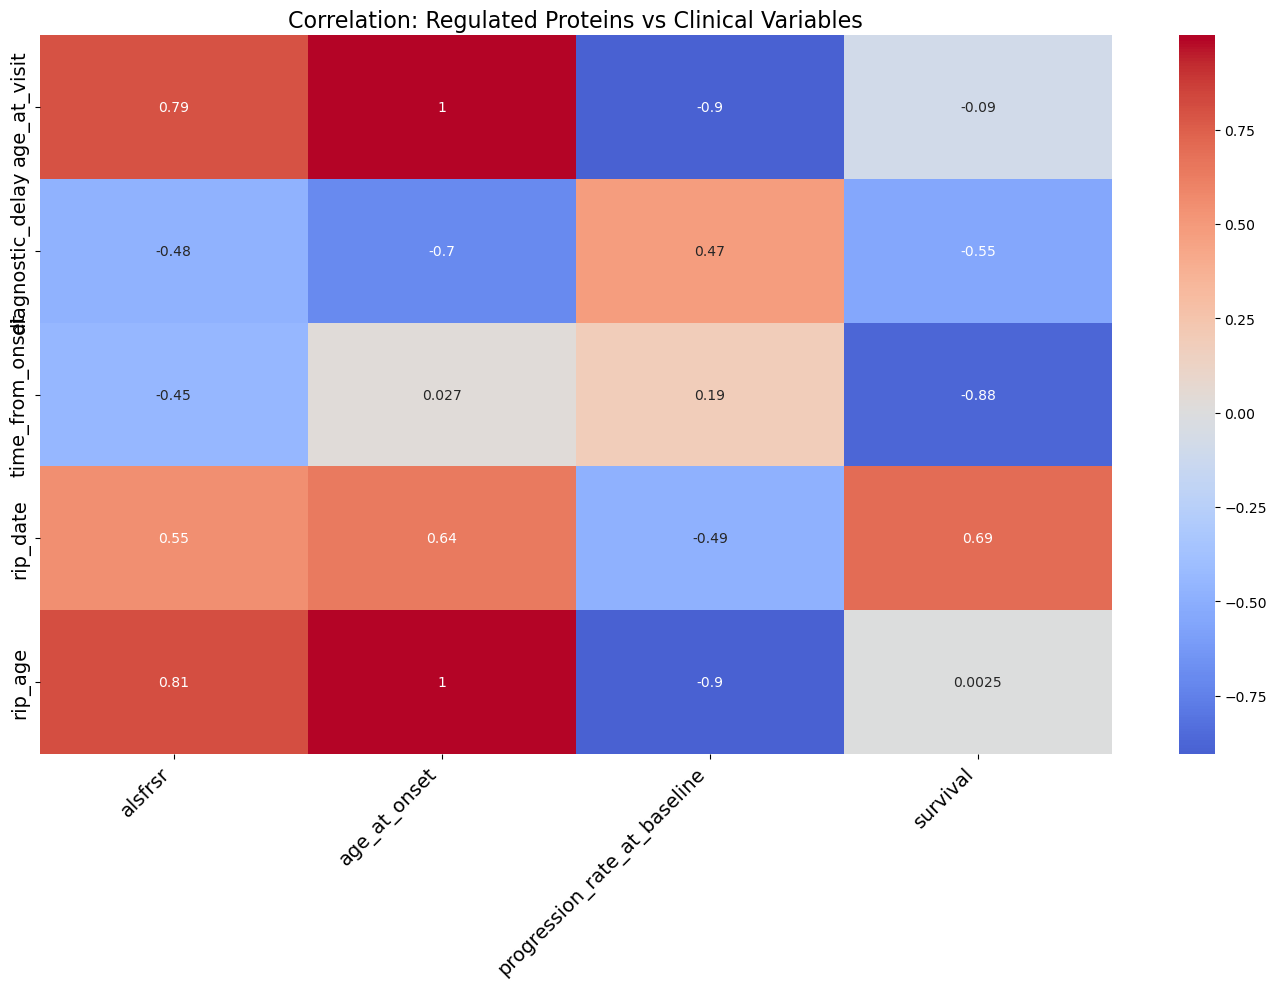

In [19]:
# Load clinical data
clinical_df = pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data.xlsx", sheet_name="Sheet3")

# Clean column names
clinical_df.columns = (
    clinical_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

# Select relevant clinical variables (baseline values)
clinical_vars = [
    "study_id",
    "alsfrsr",                     
    "age_at_onset",               
    "progression_rate_at_baseline", 
    "survival"                    
]

clinical_subset = clinical_df[clinical_vars].dropna()


# Load regulated protein data
protein_df = pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data.xlsx", sheet_name="Sheet3")  

# Ensure Study ID is a column
if protein_df.index.name == "study_id":
    protein_df = protein_df.reset_index()

# Clean protein column names
protein_df.columns = (
    protein_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# Merge datasets on study_id
merged_df = pd.merge(protein_df, clinical_subset, on="study_id", suffixes=("", "_extra"))

# Drop missing values
merged_df = merged_df.dropna()

clinical_cols = ["alsfrsr", "age_at_onset", "progression_rate_at_baseline", "survival"]

# Filter protein columns to exclude clinical ones
protein_cols = [
    col for col in protein_df.columns
    if col != "study_id" and col not in clinical_cols and pd.api.types.is_numeric_dtype(protein_df[col])
]



# Standardize data
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(merged_df[protein_cols + clinical_cols]),
    columns=protein_cols + clinical_cols
)



# Compute correlation matrix
correlation_matrix = scaled_data.corr()

# Extract cross-correlation between proteins and clinical variables
cross_corr = correlation_matrix.loc[protein_cols, clinical_cols]

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(cross_corr, annot=True, cmap="coolwarm", center=0, annot_kws={"size": 10})

# Increase axis label font size
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)

plt.title("Correlation: Regulated Proteins vs Clinical Variables", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\Client\AppData\Local\Temp\ipykernel_21052\1254159642.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clinical_df.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_21052\1254159642.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clinical_df.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_21052\1254159642.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  protein_t.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_21052\1254159642.py:29: FutureWarning: The default value of regex will change 

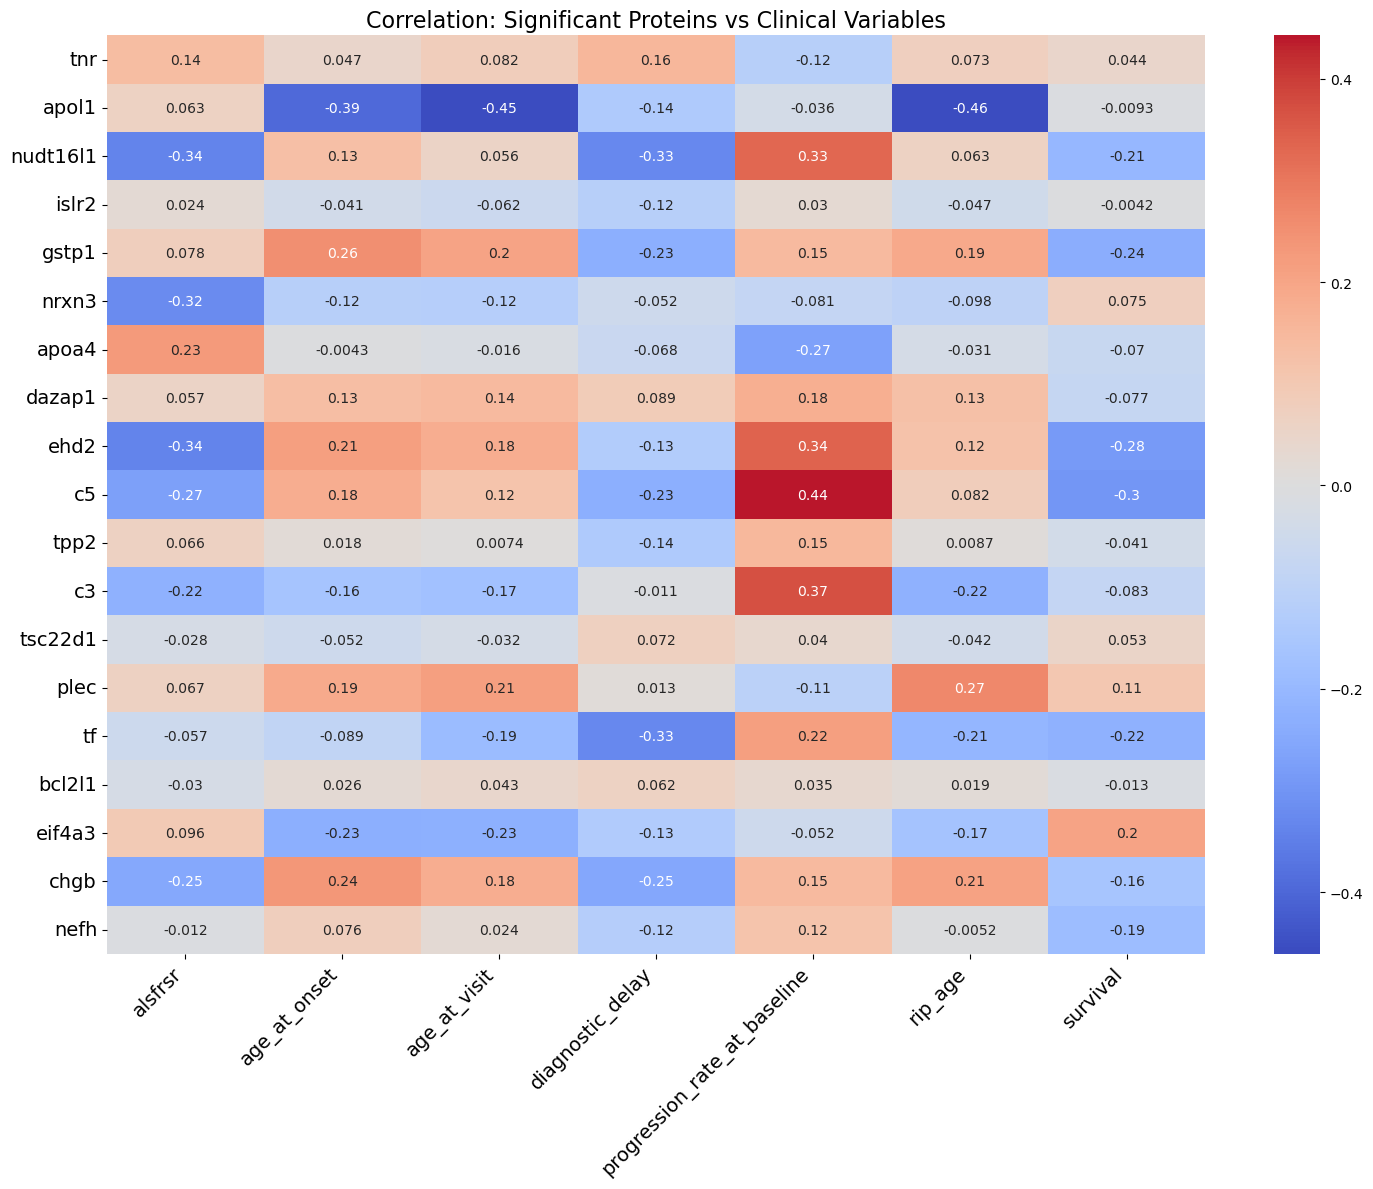

In [20]:
# Define significant proteins
significant_proteins = [
    "tnr", "apol1", "nudt16l1", "islr2", "gstp1", "nrxn3", "apoa4", "dazap1",
    "ehd2", "c5", "tpp2", "c3", "tsc22d1", "plec", "tf", "bcl2l1", "eif4a3",
    "chgb", "nefh"
]

# Define clinical variables
clinical_cols = ["alsfrsr", "age_at_onset", 'age_at_visit', 'diagnostic_delay',  "progression_rate_at_baseline", "rip_age", "survival"]

# Load clinical data
clinical_df = pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data.xlsx", sheet_name="COX data")
clinical_df.columns = (
    clinical_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

# Load protein data
protein_df = pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Soma Mann results no mistake.xlsx", sheet_name="Sheet3", header=0)    # or your actual protein file

# Transpose and clean protein data
protein_t = protein_df.set_index("Group ID").T
protein_t.columns = (
    protein_t.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)
protein_t = protein_t.reset_index().rename(columns={"index": "group_id"})

# Clean clinical data identifier
clinical_df = clinical_df.rename(columns={"group_id": "group_id"})  # Ensure consistency

# Subset protein and clinical data
protein_subset = protein_t[["group_id"] + significant_proteins].dropna()
clinical_subset = clinical_df[["group_id"] + clinical_cols].dropna()

# Merge datasets
merged_df = pd.merge(protein_subset, clinical_subset, on="group_id")
merged_df = merged_df.dropna()

# Scale and correlate
features = significant_proteins + clinical_cols
scaled = pd.DataFrame(
    StandardScaler().fit_transform(merged_df[features]),
    columns=features
)

correlation_matrix = scaled.corr()
cross_corr = correlation_matrix.loc[significant_proteins, clinical_cols]

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(cross_corr, annot=True, cmap="coolwarm", center=0)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.title("Correlation: Significant Proteins vs Clinical Variables", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\Client\AppData\Local\Temp\ipykernel_21052\4196824547.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clinical_df.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_21052\4196824547.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clinical_df.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_21052\4196824547.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  protein_t.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_21052\4196824547.py:29: FutureWarning: The default value of regex will change 

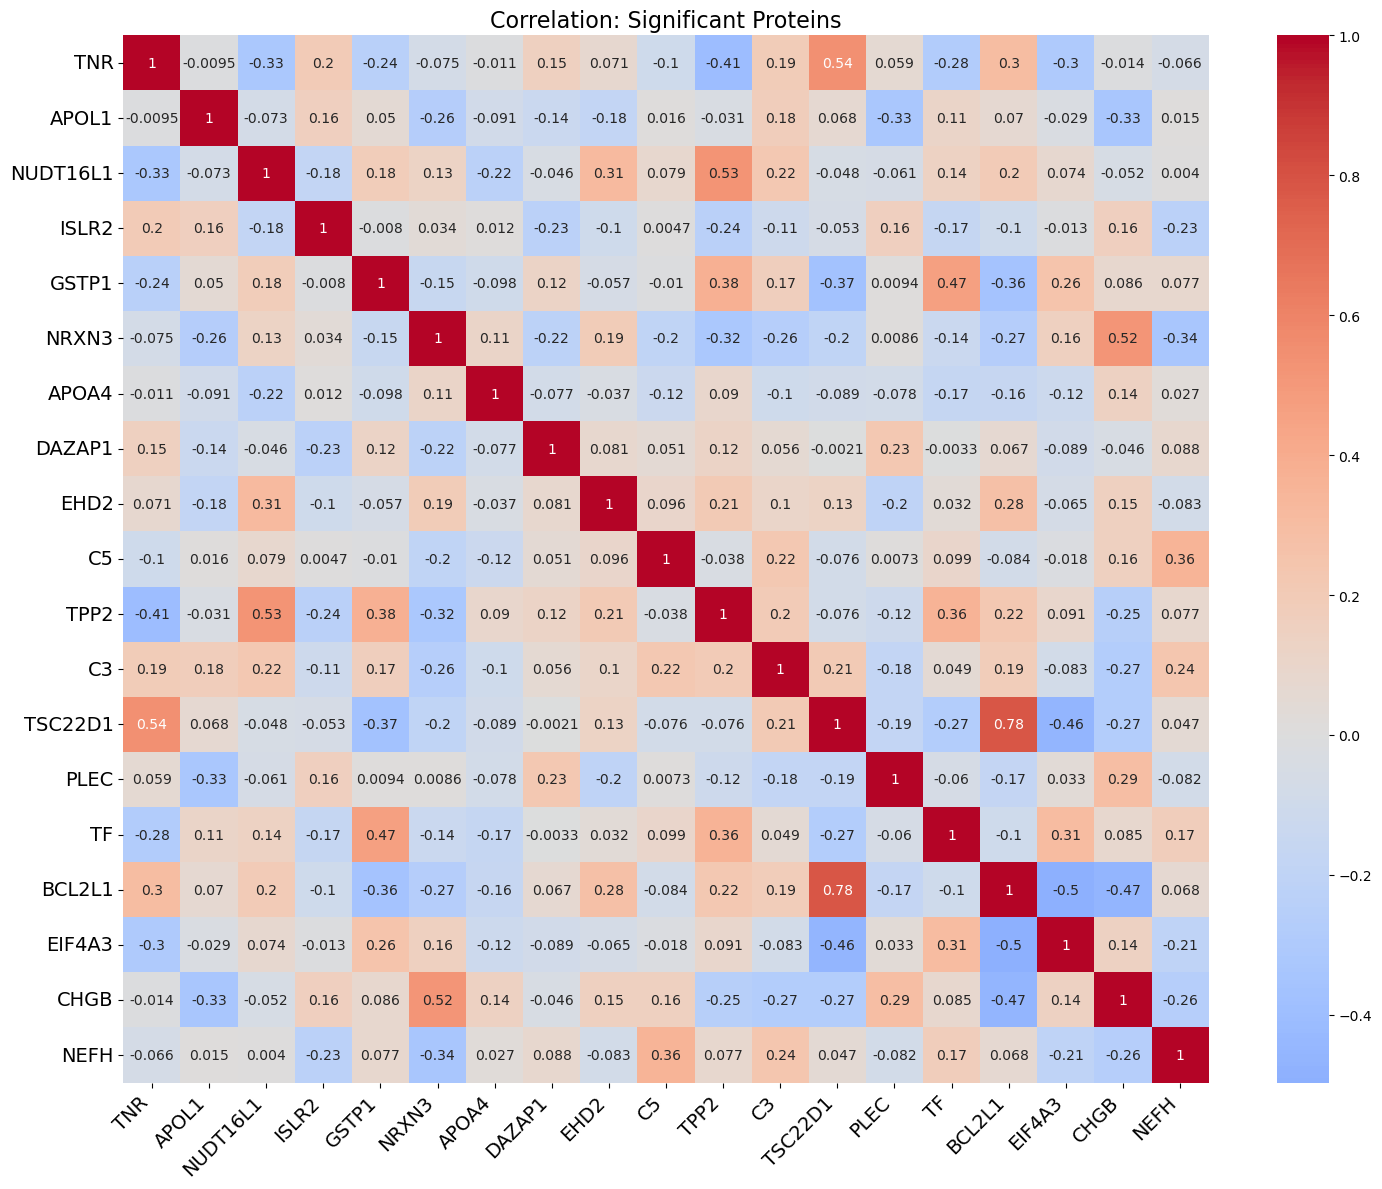

In [21]:
# Define significant proteins
significant_proteins = [
    "tnr", "apol1", "nudt16l1", "islr2", "gstp1", "nrxn3", "apoa4", "dazap1",
    "ehd2", "c5", "tpp2", "c3", "tsc22d1", "plec", "tf", "bcl2l1", "eif4a3",
    "chgb", "nefh"
]

# Define clinical variables
clinical_cols = ["alsfrsr", "age_at_onset", 'age_at_visit', 'diagnostic_delay',  "progression_rate_at_baseline", "rip_age", "survival"]

# Load clinical data
clinical_df = pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data.xlsx", sheet_name="COX data")
clinical_df.columns = (
    clinical_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

# Load protein data
protein_df = pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Soma Mann results no mistake.xlsx", sheet_name="Sheet3", header=0)

# Transpose and clean protein data
protein_t = protein_df.set_index("Group ID").T
protein_t.columns = (
    protein_t.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)
protein_t = protein_t.reset_index().rename(columns={"index": "group_id"})

# Clean clinical data identifier
clinical_df = clinical_df.rename(columns={"group_id": "group_id"})  # Ensure consistency

# Subset protein and clinical data
protein_subset = protein_t[["group_id"] + significant_proteins].dropna()
clinical_subset = clinical_df[["group_id"] + clinical_cols].dropna()

# Merge datasets
merged_df = pd.merge(protein_subset, clinical_subset, on="group_id")
merged_df = merged_df.dropna()

# Scale and correlate only significant proteins
scaled_proteins = pd.DataFrame(
    StandardScaler().fit_transform(merged_df[significant_proteins]),
    columns=[p.upper() for p in significant_proteins]  # convert to uppercase
)

# Compute correlation matrix among significant proteins
protein_corr = scaled_proteins.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(protein_corr, annot=True, cmap="coolwarm", center=0)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.title("Correlation: Significant Proteins", fontsize=16)
plt.tight_layout()
plt.show()

In [32]:
# === Define clinical features and protein columns ===
clinical_features = [
    "alsfrsr",
    "age_at_onset",
    "age_at_visit",
    "diagnostic_delay",
    "progression_rate_at_baseline",
    "rip_age",
    "survival"
]

# Assume all other numeric columns are proteins
protein_cols = [col for col in clinical_df.columns if col not in clinical_features]

# === Compute correlation and p-values ===
corr_matrix = pd.DataFrame(index=protein_cols, columns=clinical_features, dtype=float)
pval_matrix = pd.DataFrame(index=protein_cols, columns=clinical_features, dtype=float)

for protein in protein_cols:
    for feature in clinical_features:
        # Drop NA values
        valid = clinical_df[[protein, feature]].dropna()
        if len(valid) > 2:  # need at least 3 points
            r, p = pearsonr(valid[protein], valid[feature])
            corr_matrix.loc[protein, feature] = r
            pval_matrix.loc[protein, feature] = p
        else:
            corr_matrix.loc[protein, feature] = np.nan
            pval_matrix.loc[protein, feature] = np.nan

# === Mask non-significant correlations (p > 0.05) ===
mask = pval_matrix > 0.05

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix.astype(float),
    mask=mask,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Pearson correlation"}
)
plt.title("Protein vs Clinical Features Correlation (significant only, p < 0.05)")
plt.tight_layout()
plt.show()

# === Save results ===
corr_matrix.to_csv("protein_clinical_correlations.csv")
pval_matrix.to_csv("protein_clinical_pvalues.csv")


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [31]:
from scipy.stats import pearsonr

C:\Users\Client\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\Client\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


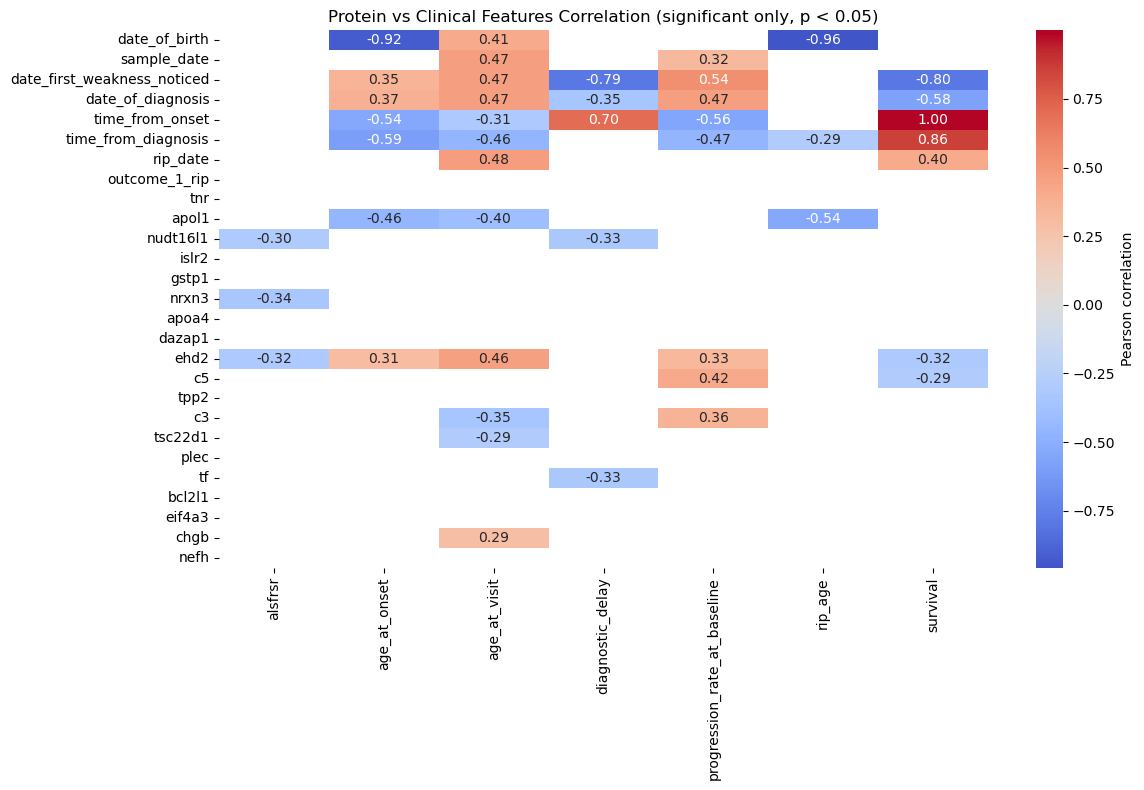

In [34]:
# Define clinical features
clinical_features = [
    "alsfrsr",
    "age_at_onset",
    "age_at_visit",
    "diagnostic_delay",
    "progression_rate_at_baseline",
    "rip_age",
    "survival"
]
# Keep only numeric columns that are not clinical features
protein_cols = [
    col for col in df.columns
    if col not in clinical_features and pd.api.types.is_numeric_dtype(df[col])
]

# === Initialize correlation and p-value matrices ===
corr_matrix = pd.DataFrame(index=protein_cols, columns=clinical_features, dtype=float)
pval_matrix = pd.DataFrame(index=protein_cols, columns=clinical_features, dtype=float)

# Keep only numeric protein columns
for col in clinical_df.columns:
    if col not in clinical_features:
        # Try converting to numeric; if most values are numeric, keep it
        numeric_series = pd.to_numeric(clinical_df[col], errors="coerce")
        if numeric_series.notna().sum() > 0:  # at least some numeric values
            clinical_df[col] = numeric_series
            protein_cols.append(col)

# Initialize matrices
corr_matrix = pd.DataFrame(index=protein_cols, columns=clinical_features, dtype=float)
pval_matrix = pd.DataFrame(index=protein_cols, columns=clinical_features, dtype=float)

# Compute correlations
for protein in protein_cols:
    for feature in clinical_features:
        valid = clinical_df[[protein, feature]].dropna()
        if len(valid) > 2:
            r, p = pearsonr(valid[protein], valid[feature])
            corr_matrix.loc[protein, feature] = r
            pval_matrix.loc[protein, feature] = p
        else:
            corr_matrix.loc[protein, feature] = np.nan
            pval_matrix.loc[protein, feature] = np.nan

# Mask non-significant correlations
mask = pval_matrix > 0.05

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix.astype(float),
    mask=mask,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Pearson correlation"}
)
plt.title("Protein vs Clinical Features Correlation (significant only, p < 0.05)")
plt.tight_layout()
plt.show()

# Save results
corr_matrix.to_csv("protein_clinical_correlations.csv")
pval_matrix.to_csv("protein_clinical_pvalues.csv")


C:\Users\Client\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\Client\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


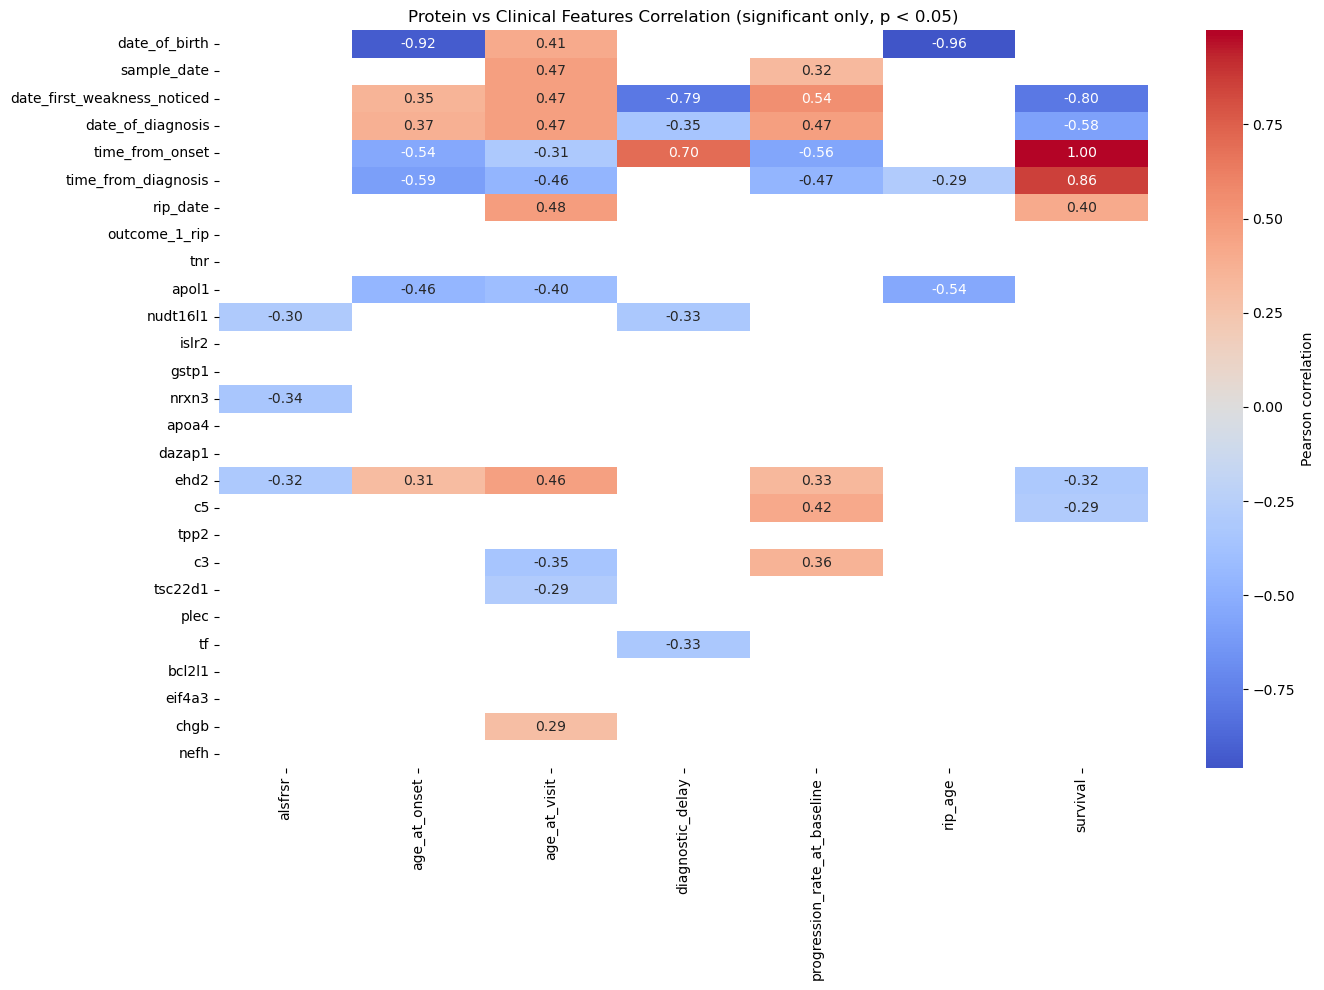

In [35]:

# === Define clinical features ===
clinical_features = [
    "alsfrsr",
    "age_at_onset",
    "age_at_visit",
    "diagnostic_delay",
    "progression_rate_at_baseline",
    "rip_age",
    "survival"
]

# === Identify protein columns ===
# Keep only numeric columns that are not clinical features
protein_cols = [
    col for col in clinical_df.columns
    if col not in clinical_features and pd.api.types.is_numeric_dtype(clinical_df[col])
]

# === Initialize correlation and p-value matrices ===
corr_matrix = pd.DataFrame(index=protein_cols, columns=clinical_features, dtype=float)
pval_matrix = pd.DataFrame(index=protein_cols, columns=clinical_features, dtype=float)

# === Compute correlations ===
for protein in protein_cols:
    for feature in clinical_features:
        valid = clinical_df[[protein, feature]].dropna()
        if len(valid) > 2:
            r, p = pearsonr(valid[protein], valid[feature])
            corr_matrix.loc[protein, feature] = r
            pval_matrix.loc[protein, feature] = p
        else:
            corr_matrix.loc[protein, feature] = np.nan
            pval_matrix.loc[protein, feature] = np.nan

# === Mask non-significant correlations (p > 0.05) ===
mask = pval_matrix > 0.05

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix.astype(float),
    mask=mask,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Pearson correlation"}
)
plt.title("Protein vs Clinical Features Correlation (significant only, p < 0.05)")
plt.tight_layout()
plt.show()

# === Save results ===
corr_matrix.to_csv("protein_vs_clinical_correlations.csv")
pval_matrix.to_csv("protein_vs_clinical_pvalues.csv")


C:\Users\Client\AppData\Local\Temp\ipykernel_21052\878023504.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clinical_df.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_21052\878023504.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clinical_df.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_21052\878023504.py:37: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  protein_t.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_21052\878023504.py:37: FutureWarning: The default value of regex will change from

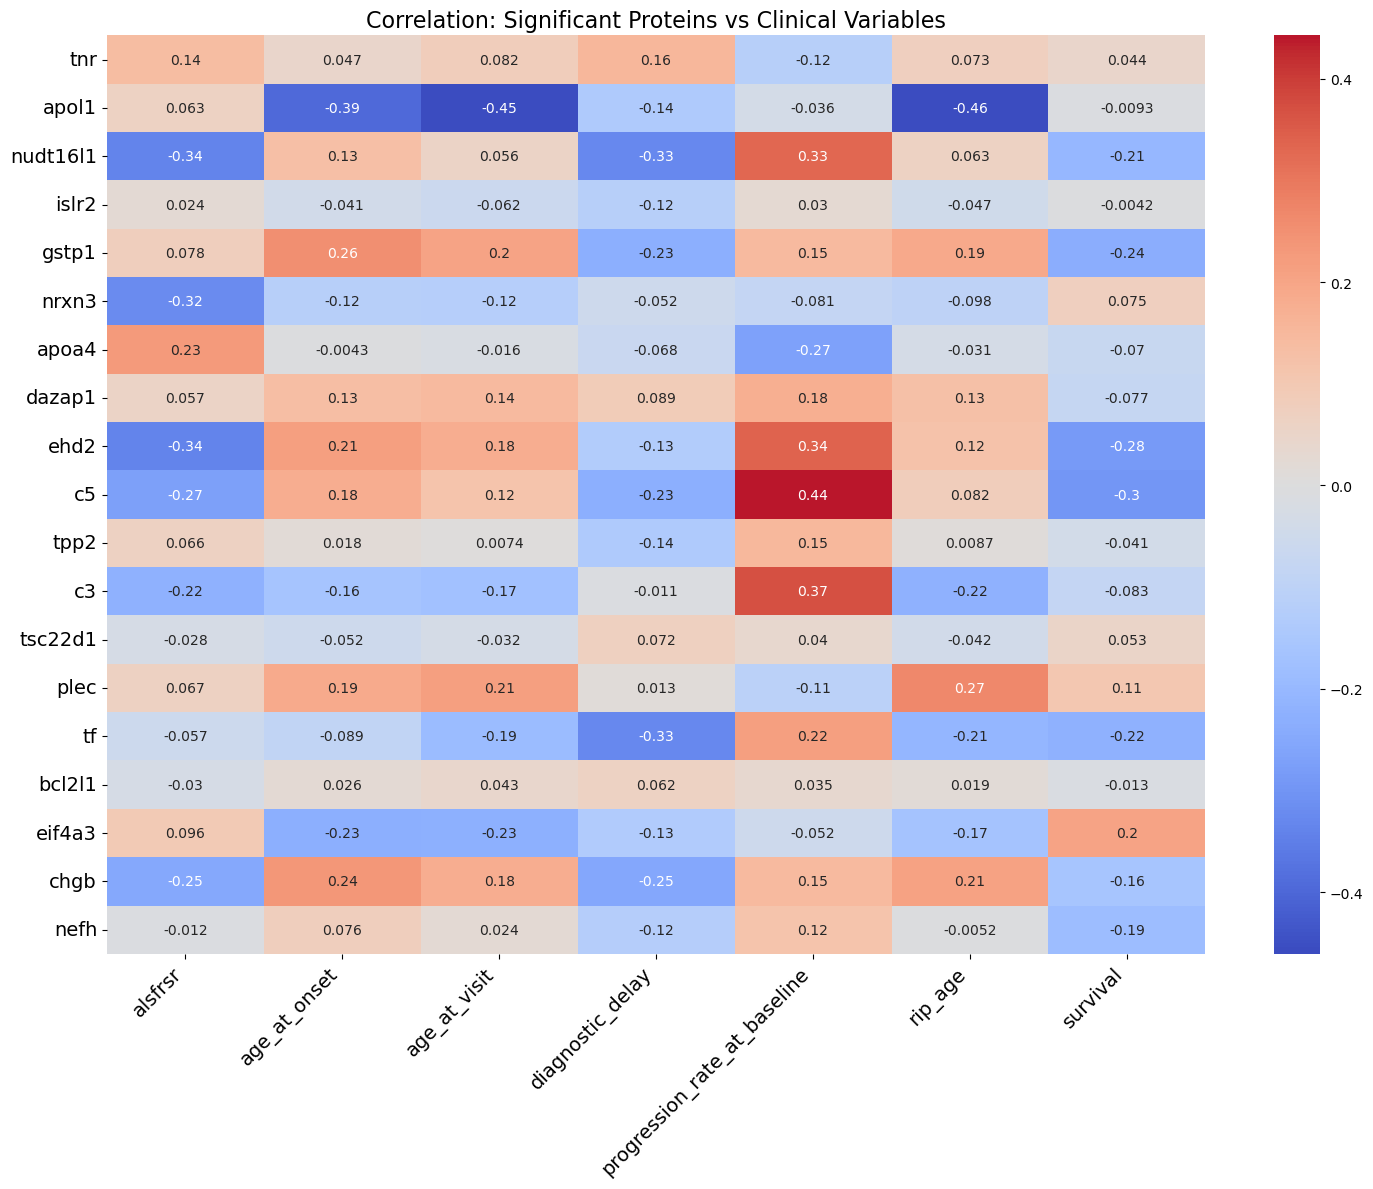

In [36]:
# === Define proteins and clinical features ===
significant_proteins = [
    "tnr", "apol1", "nudt16l1", "islr2", "gstp1", "nrxn3", "apoa4", "dazap1",
    "ehd2", "c5", "tpp2", "c3", "tsc22d1", "plec", "tf", "bcl2l1", "eif4a3",
    "chgb", "nefh"
]

clinical_cols = [
    "alsfrsr", "age_at_onset", "age_at_visit", "diagnostic_delay",
    "progression_rate_at_baseline", "rip_age", "survival"
]

# === Load and clean clinical data ===
clinical_df = pd.read_excel(
    r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data.xlsx",
    sheet_name="COX data"
)
clinical_df.columns = (
    clinical_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

# === Load and clean protein data ===
protein_df = pd.read_excel(
    r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Soma Mann results no mistake.xlsx",
    sheet_name="Sheet3",
    header=0
)

protein_t = protein_df.set_index("Group ID").T
protein_t.columns = (
    protein_t.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)
protein_t = protein_t.reset_index().rename(columns={"index": "group_id"})

# === Subset and merge ===
protein_subset = protein_t[["group_id"] + significant_proteins].dropna()
clinical_subset = clinical_df[["group_id"] + clinical_cols].dropna()
merged_df = pd.merge(protein_subset, clinical_subset, on="group_id").dropna()

# === Scale numeric values ===
features = significant_proteins + clinical_cols
scaled = pd.DataFrame(
    StandardScaler().fit_transform(merged_df[features]),
    columns=features
)

# === Compute correlations (proteins vs clinical features only) ===
corr_matrix = pd.DataFrame(index=significant_proteins, columns=clinical_cols, dtype=float)
pval_matrix = pd.DataFrame(index=significant_proteins, columns=clinical_cols, dtype=float)

for protein in significant_proteins:
    for feature in clinical_cols:
        r, p = pearsonr(scaled[protein], scaled[feature])
        corr_matrix.loc[protein, feature] = r
        pval_matrix.loc[protein, feature] = p

# === Plot heatmap of correlations ===
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap="coolwarm", center=0)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.title("Correlation: Significant Proteins vs Clinical Variables", fontsize=16)
plt.tight_layout()
plt.show()

# === Save outputs ===
corr_matrix.to_csv("protein_vs_clinical_correlations.csv")
pval_matrix.to_csv("protein_vs_clinical_pvalues.csv")
